In [1]:
# Figure showing flower counting linear evaluation performance.
import pandas as pd

linear_eval_data = pd.read_excel("Linear Evaluation Results.xlsx", sheet_name="# Flowers")
linear_eval_data

,Pre-Train,Multi View?,# Views,Train Set,Test Set,MAE,SMAPE
0,COCo,N,NaN,ssl_active_3,ssl_active_2,0.87,128
1,Random,N,NaN,ssl_active_3,ssl_active_2,0.82,123
2,SimCLR,Y,4.0,ssl_active_3,ssl_active_2,0.88,130
3,COCo,N,NaN,active_1,2018-08-22 00:00:00,1.73,99
4,Random,N,NaN,active_1,2018-08-22 00:00:00,1.76,91
5,SimCLR,Y,4.0,active_1,2018-08-22 00:00:00,1.71,111
6,SimCLR,Y,2.0,active_1,2018-08-22 00:00:00,1.62,92
7,SimCLR,Y,2.0,ssl_active_3,ssl_active_2,0.72,130
8,SimCLR,N,NaN,active_1,2018-08-22 00:00:00,1.70,109
9,SimCLR,N,NaN,ssl_active_3,ssl_active_2,0.84,138


In [2]:
is_ground = linear_eval_data["Train Set"] == "ssl_active_3"
linear_eval_data["Platform"] = ["ground" if g else "aerial" for g in is_ground]

In [3]:
def _create_model_name(row: pd.Series) -> str:
    if row["Pre-Train"] != "SimCLR":
        return row["Pre-Train"]
    if row["Multi View?"] == "N":
        return "Vanilla SimCLR"
    return f"{int(row['# Views'])}-View SimCLR"

linear_eval_data["Name"] = linear_eval_data.apply(_create_model_name, axis=1)

In [4]:
linear_eval_data

,Pre-Train,Multi View?,# Views,Train Set,Test Set,MAE,SMAPE,Platform,Name
0,COCo,N,NaN,ssl_active_3,ssl_active_2,0.87,128,ground,COCo
1,Random,N,NaN,ssl_active_3,ssl_active_2,0.82,123,ground,Random
2,SimCLR,Y,4.0,ssl_active_3,ssl_active_2,0.88,130,ground,4-View SimCLR
3,COCo,N,NaN,active_1,2018-08-22 00:00:00,1.73,99,aerial,COCo
4,Random,N,NaN,active_1,2018-08-22 00:00:00,1.76,91,aerial,Random
5,SimCLR,Y,4.0,active_1,2018-08-22 00:00:00,1.71,111,aerial,4-View SimCLR
6,SimCLR,Y,2.0,active_1,2018-08-22 00:00:00,1.62,92,aerial,2-View SimCLR
7,SimCLR,Y,2.0,ssl_active_3,ssl_active_2,0.72,130,ground,2-View SimCLR
8,SimCLR,N,NaN,active_1,2018-08-22 00:00:00,1.70,109,aerial,Vanilla SimCLR
9,SimCLR,N,NaN,ssl_active_3,ssl_active_2,0.84,138,ground,Vanilla SimCLR


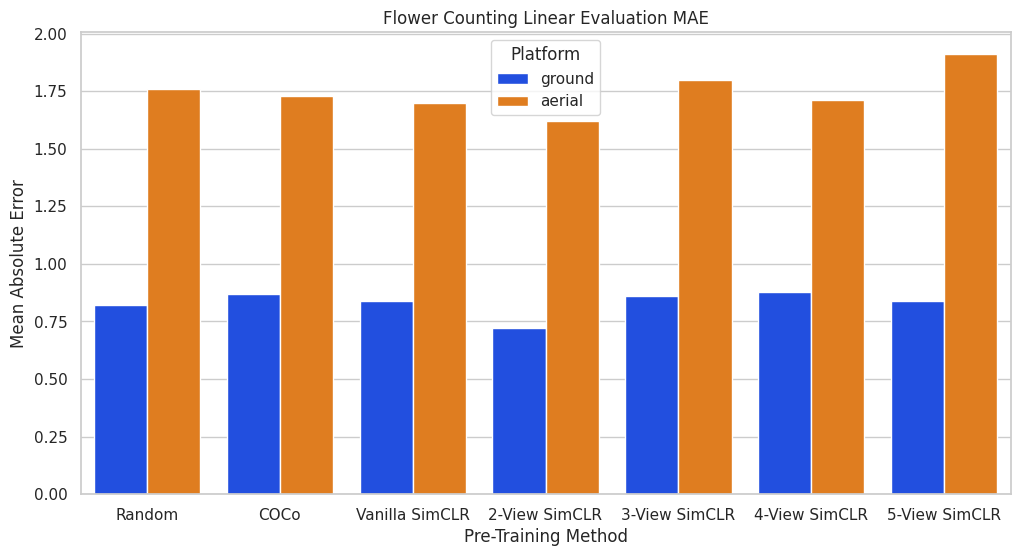

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
x_ordered = ["Random", "COCo", "Vanilla SimCLR", "2-View SimCLR", "3-View SimCLR", "4-View SimCLR", "5-View SimCLR"]
sns.barplot(data=linear_eval_data, x="Name", y='MAE', hue='Platform', palette='bright', order=x_ordered)
plt.title('Flower Counting Linear Evaluation MAE')
plt.xlabel('Pre-Training Method')
plt.ylabel('Mean Absolute Error')
plt.legend(title='Platform')

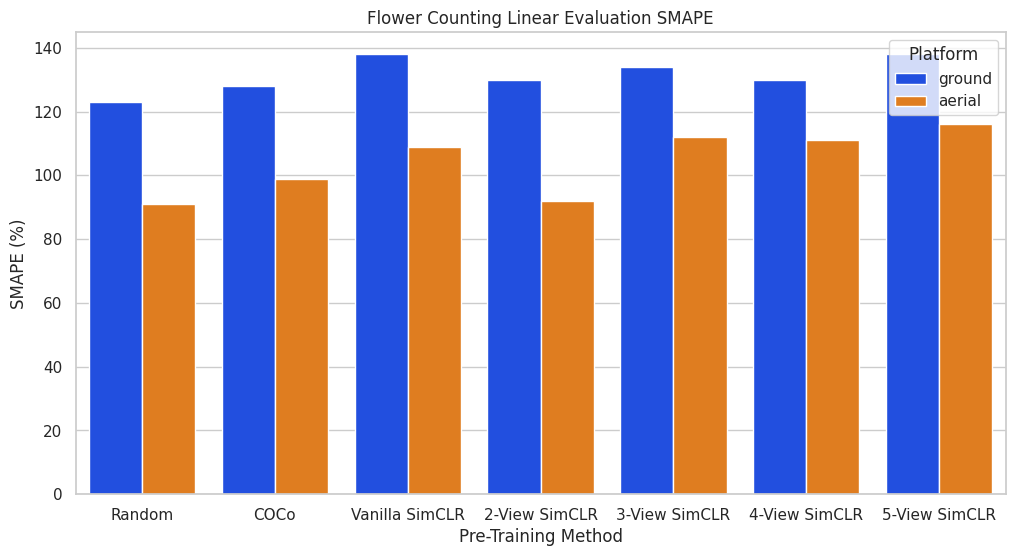

In [6]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=linear_eval_data, x='Name', y='SMAPE', hue='Platform', palette='bright', order=x_ordered)
plt.title('Flower Counting Linear Evaluation SMAPE')
plt.xlabel('Pre-Training Method')
plt.ylabel('SMAPE (%)')
plt.legend(title='Platform')

In [7]:
# Create the figure showing plot status linear eval data.
plot_status_data = pd.read_excel("Linear Evaluation Results.xlsx", sheet_name="Plot Status")
plot_status_data

,Pre-Train,Multi View?,# Views,Test Acc.
0,SimCLR,Y,4.0,0.85
1,COCo,N,NaN,0.70
2,Random,N,NaN,0.45
3,SimCLR,Y,2.0,0.85
4,SimCLR,N,NaN,0.80
5,SimCLR,Y,3.0,0.90
6,SimCLR,Y,5.0,0.80


In [8]:
plot_status_data["Name"] = plot_status_data.apply(_create_model_name, axis=1)
plot_status_data

,Pre-Train,Multi View?,# Views,Test Acc.,Name
0,SimCLR,Y,4.0,0.85,4-View SimCLR
1,COCo,N,NaN,0.70,COCo
2,Random,N,NaN,0.45,Random
3,SimCLR,Y,2.0,0.85,2-View SimCLR
4,SimCLR,N,NaN,0.80,Vanilla SimCLR
5,SimCLR,Y,3.0,0.90,3-View SimCLR
6,SimCLR,Y,5.0,0.80,5-View SimCLR


Text(0, 0.5, 'Accuracy (%)')

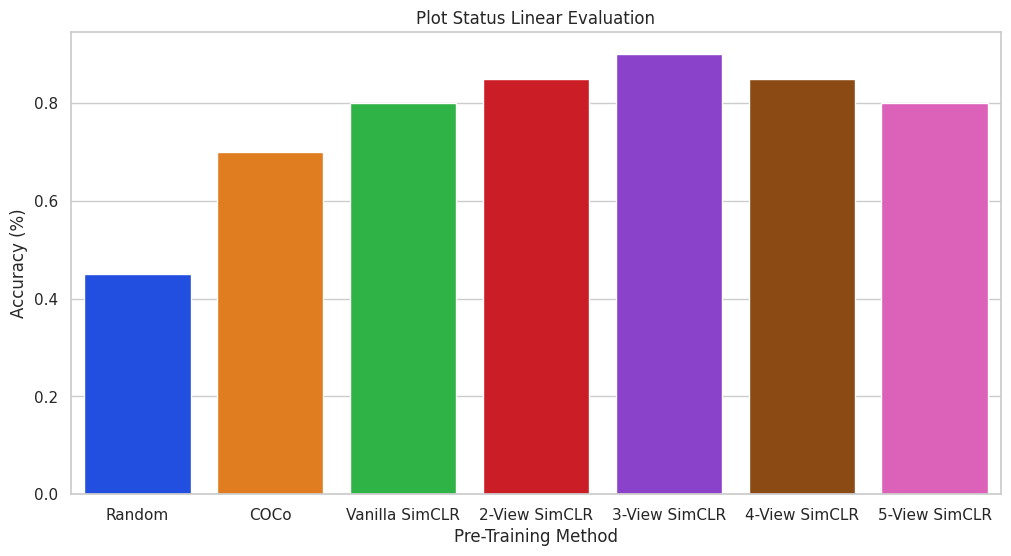

In [9]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_status_data, x='Name', y='Test Acc.', palette='bright', order=x_ordered)
plt.title('Plot Status Linear Evaluation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')